## 머신러닝
##### 머신러닝이란?
- 데이터(과거)를 기반으로 학습을 시켜 예측(미래)을 수행하는 기법
- 통계학, 데이터마이닝, 컴퓨터비전이 어우러진 분야

- 문제데이터 : X, 특성, 독립변수...
- 정답데이터 : y, 라벨, 타겟, 종속변수...

### 머신러닝 종류
1. 지도학습(Supervised Learning)
- 데이터에 대한 Label(정답)이 주어진 상태에서 컴퓨터를 학습시키는 방법
- 예측하려는 값이 어떤지에 따라 분류와 회귀로 나뉨
    - 분류(Classification) : 예측하려는 값이 범주형 데이터인 경우
        - 스팸메일분류, 성별 분류 등
    - 회귀(Regression) : 예측하려는 값이 연속형 데이터인 경우
        - 주식 예측, 집가격 예측 등
  
2. 비지도학습(Unsupervised Learning)
- 데이터에 대한 Label(정답)이 없는 상태에서 컴퓨터를 학습시키는 방법
- 데이터의 숨겨진 특성, 구조, 패턴을 파악하는데 활용
- 클러스터링(Clustering / 군집화), 차원축소(Dimesionality Reduction) 등

3. 강화학습(Reingorcement Learning)
- 지도학습과 유사하나, 완전한 답(Label)을 제공하지 않음
- 더 많은 보상을 얻을 수 있는 방향으로 행동을 학습
- 게임이나 로봇을 학습시키는데 많이 사용

### 머신러닝 프로세스
1. 문제정의 -> 예측하려는 값을 정의(가능하면 구체적으로)
    - 현재 필요한 솔류션의 구성 파악
    - 지도, 비지도, 강화 선택
    - 지도 - 분류, 회귀 선택
2. 데이터 수집
    - File, Database, Web Crawler, IoT센서, 설문조사, API 등....
3. EDA(탐색적 데이터 분석)
    - 분석적 접근, 기술통계를 통한 상관관계, 그래프 확인
    - 시각화
4. 데이터 전처리
    1. 결측치 제거 및 대체
    2. 이상치 제거 및 대체
    3. 변수 처리(불필요 시 컬럼 제거, 필요 시 파생변수 추가, 인코딩(범주형 -> 수치형) 등)
    4. 데이터 분리(모델링 시에만 진행)

5. Model 선택 및 Hyper Parameter(셋팅값)
    - 최적의 모델 선택 및 최적의 Hyper Parameter 선택

6. Model 학습(Training)
    - fit() : 학습
    
7. Modle 평가(Evaluation)
    - score() : 평가
    - 분류와 회귀의 평가지표는 서로 상이!

In [2]:
# 원하는 위치에 커서 올려두고, Ctrl + Shift + '-'
# 셀 합치고자 하는 경우 Shift + m

#### 1. 문제정의
- 500명의 키, 몸무게 데이터를 활용해서 비만도를 판별하는 모델 생성
- 머신러닝 프로세스 이해
- Class : 정답의 고유값
    - Extreme Obesity : 고도 비만
    - Obesity : 비만
    - Overweight : 과체중
    - Normal : 정상
    - Weak : 저체중
    - Extremely Weak: 심한 저체중
- 다중분류 진행
    - 이진분류 : 2가지의 클래스를 분류
    - 다중분류 : 3가지 이상의 클래스를 분류

#### 2. 데이터 수집

In [3]:
# !pip install sklearn
# 사이킷런 설치

In [4]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# 머신러닝 패키지
from sklearn.neighbors import KNeighborsClassifier # KNN 분류모델
from sklearn.metrics import accuracy_score # 정확도 측정도구

In [5]:
# 데이터 불러오기
# index_col = '컬럼명' : 컬럼을 index로 설정
data = pd.read_csv("./data/bmi_500.csv", index_col="Label")
data

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


#### 3. EDA
#### 4. 데이터전처리

In [6]:
data.info()
# DataFrame의 정보 확인
# 전체 행의 개수, 열의 개수나 컬럼 정보
# 결측치 여부 등
# 현재 데이터는 결측치 없음!

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [7]:
# 4분위수 : 데이터의 분포를 작은 수부터 큰 수로 나열하여 4등분한 결과
# 25% = Q1, 제 1사분위수
# 50% = 중앙값, Q2, 제 2사분위수
# 75% = Q3, 제 3사분위수
# 100% = Q4, 제 4사분위수
# 평균, 중앙값, 최빈값
# 수치 데이터 : 평균, 중앙값
# 문자 데이터 : 최빈값

In [8]:
data.describe().T
# 기술통계량 확인 -> 수치값들의 요약본
# 수치데이터에 대한 요약본 제공

,count,mean,std,min,25%,50%,75%,max
Height,500.0,169.944,16.375261,140.0,156.0,170.5,184.0,199.0
Weight,500.0,106.000,32.382607,50.0,80.0,106.0,136.0,160.0


In [9]:
data.describe(include='object').T
# include 속성 설정을 통해 문자 데이터에 대한 요약본 확인 가능

,count,unique,top,freq
Gender,500,2,Female,255


In [10]:
data.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

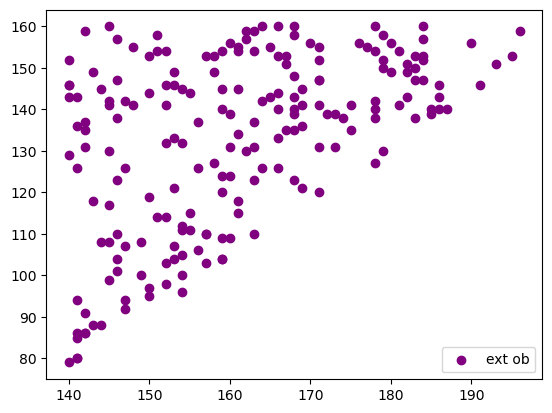

In [11]:
# 시각화 (bmi 클래스별로 분표 현황 시각화)
# 산점도(scatter)
# 고도비만(Extreme Obesity)
E0 = data.loc["Extreme Obesity"]

# scatter(x축, y축)
plt.scatter(E0['Height'], E0['Weight'], color = "purple", label="ext ob")

# 범례 표시
plt.legend()

plt.show()

In [1]:
# 함수 정의
def graph_draw(label, c) : 
    E0 = data.loc[label]
    plt.scatter(E0['Height'], E0['Weight'], color = c, label=label)

1. Extreme Obesity : 고도 비만
2. Obesity : 비만
3. Overweight : 과체중
4. Normal : 정상
5. Weak : 저체중
6. Extremely Weak: 심한 저체중

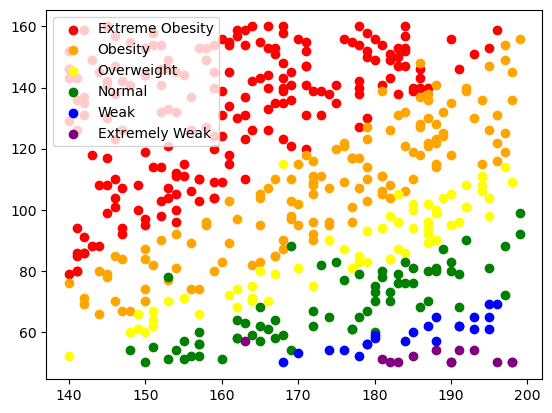

In [19]:
# 함수 호출하기
# 각 라벨에 따른 색상 지정
c_list = ["red",'orange','yellow','green','blue','purple']

# index.unique()값이 정렬이 안 되어있어서, 직접 라벨 순서대로 작성
label_list = ["Extreme Obesity", "Obesity", "Overweight",
              'Normal', 'Weak', 'Extremely Weak']

# enumerate() : 인덱스 번호와 value를 함께 추출
for i, label in enumerate(label_list) :
    graph_draw(label, c_list[i])

plt.legend()
plt.show()

In [20]:
data

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61
...,...,...,...
Extreme Obesity,Female,150,153
Obesity,Female,184,121
Extreme Obesity,Female,141,136


- 데이터 분리
    - 문제데이터(X, 2차원) : Height, Weight
    - 정답데이터(y, 1차원) : Label

In [27]:
# 문제데이터 : 다중인덱싱 활용해서 Height, Weight 지정
X = data[['Height','Weight']]

In [28]:
# 정답데이터
y = data.index

In [34]:
# train, test 분리
# 한정적인 데이터 내에서 학습하고 평가까지 해야되기 때문에 분리!

# 훈련용 데이터셋 : 500ea 70% → 350ea
X_train = X.iloc[:350]
y_train = y[:350]

# 테스트용 데이터셋 : 30% → 150ea
X_test = X.iloc[350:]
y_test = y[350:]

In [35]:
# 문제(X)와 정답(y)은 개수가 동일한지 확인!
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((350, 2), (350,), (150, 2), (150,))

#### 5. 모델선택 및 하이퍼파리미터 조정

#### 6. 모델학습

In [39]:
# 모델 생성(초기화)
knn_model = KNeighborsClassifier()
knn_model

KNeighborsClassifier()

In [40]:
# 모델학습
# 모델이름.fit(학습용 문제, 학습용 답)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
# 모델 예측
# 모델이름.predict(테스트용 문제)
pred = knn_model.predict(X_test)
pred

array(['Overweight', 'Normal', 'Normal', 'Extreme Obesity',
       'Extremely Weak', 'Obesity', 'Obesity', 'Extreme Obesity', 'Weak',
       'Extreme Obesity', 'Weak', 'Extreme Obesity', 'Extreme Obesity',
       'Obesity', 'Extreme Obesity', 'Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Normal', 'Normal',
       'Normal', 'Normal', 'Overweight', 'Extreme Obesity', 'Overweight',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Obesity', 'Normal', 'Obesity', 'Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme

#### 7. 모델평가

In [43]:
# 1. 모델 자체에서 제공하는 평가 함수 활용 -> pred 필요없음
knn_model.score(X_test, y_test)
# 정확도 : 90.67%

0.9066666666666666

In [44]:
# 2. metrics 활용 -> pred 필요
accuracy_score(y_test, pred)

0.9066666666666666